# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**


In this lab, you will use the skills acquired  to explore the effect of different features on the price of laptops. 


## ROOM 4 MEMBERS
## Yawe Arthur Shalom M23B23/016
## Mokili Promise M23B23/032
## Tendo Calvin S23B23/013
## Nicholas Wangobi M23B23/031

# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


In [1]:
!python -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.4 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 1.4 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


### Importing Required Libraries


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


The functions below will download the dataset into your browser:


In [4]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [5]:
df = pd.read_csv(filepath, header=0)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [7]:
Room4_df = df

In [8]:
Room4_df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [9]:
# filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
# df = pd.read_csv(filepath, header=None)
# df.head()

Print the first 5 entries of the dataset to confirm loading.


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


<Axes: xlabel='CPU_frequency', ylabel='Price'>

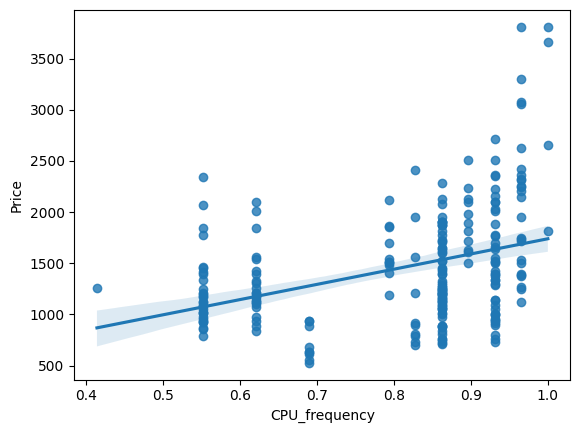

In [10]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot

sns.regplot(x='CPU_frequency',y='Price',data=Room4_df)


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

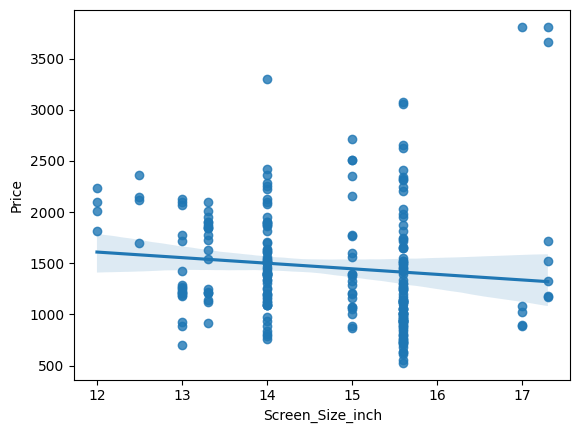

In [11]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot

sns.regplot(x='Screen_Size_inch',y='Price',data=Room4_df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

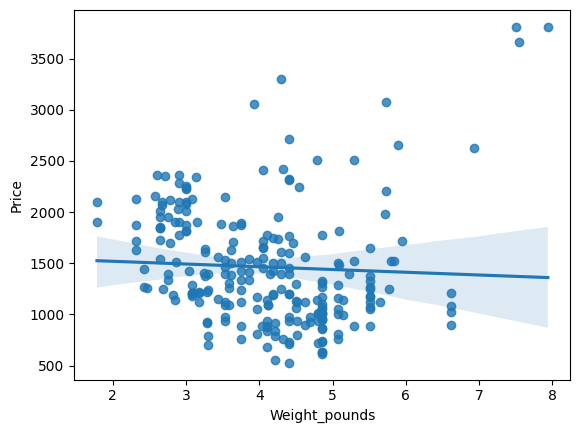

In [12]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot

sns.regplot(x='Weight_pounds',y='Price',data=Room4_df)

In [13]:
# Correlation values of the three attributes with Price

In [14]:
Price_CPUFrequency_Corr = Room4_df[['CPU_frequency','Price']].corr()
Price_CPUFrequency_Corr

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


In [15]:
Price_ScreenSizeInch_Corr = Room4_df[['Screen_Size_inch','Price']].corr()
Price_ScreenSizeInch_Corr

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


In [16]:
Price_WeightPounds_Corr = Room4_df[['Weight_pounds','Price']].corr()
Price_WeightPounds_Corr

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<Axes: xlabel='Category', ylabel='Price'>

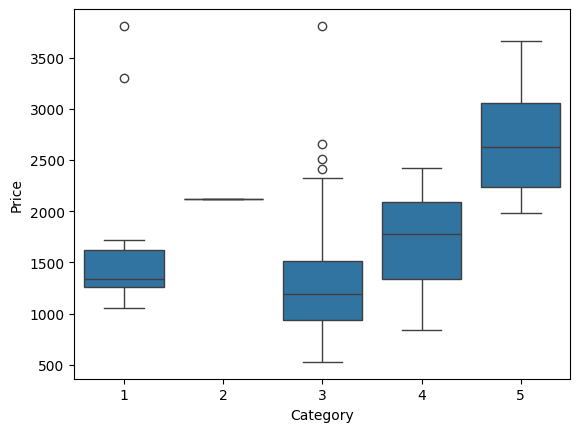

In [17]:
# Write your code below and press Shift+Enter to execute
# Category Box plot

sns.boxplot(x='Category',y='Price',data=Room4_df)

<Axes: xlabel='GPU', ylabel='Price'>

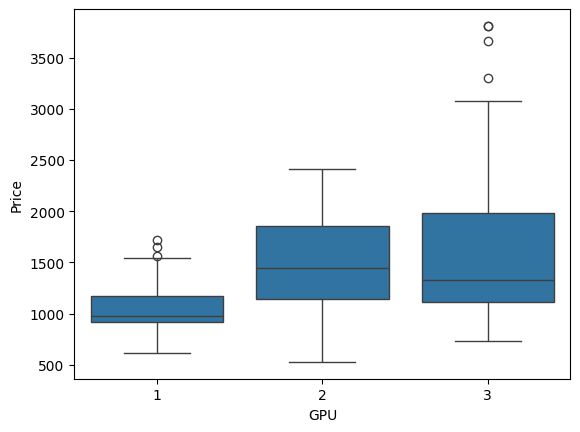

In [18]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot

sns.boxplot(x='GPU',y='Price',data=Room4_df)

<Axes: xlabel='OS', ylabel='Price'>

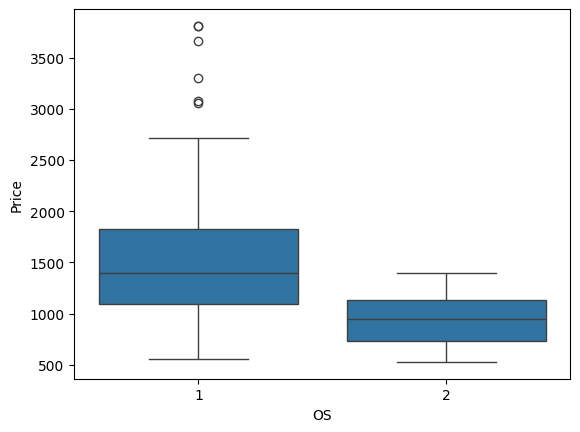

In [19]:
# Write your code below and press Shift+Enter to execute
# OS Box plot

sns.boxplot(x='OS',y='Price',data=Room4_df)

<Axes: xlabel='CPU_core', ylabel='Price'>

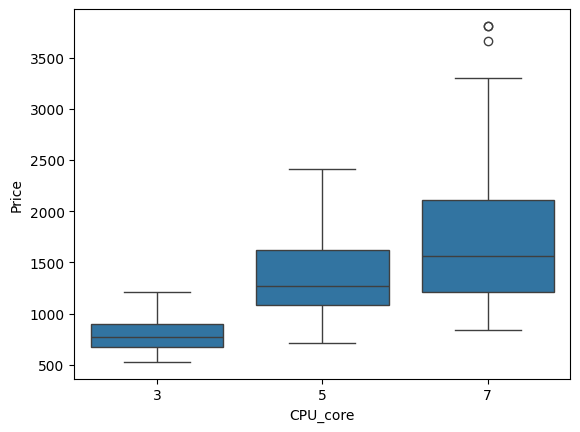

In [20]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot

sns.boxplot(x='CPU_core',y='Price',data=Room4_df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

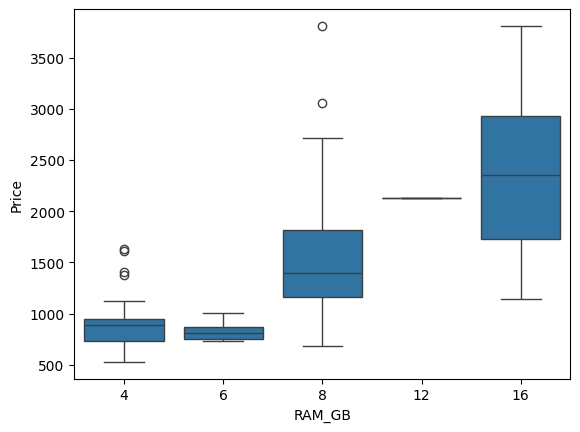

In [21]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot

sns.boxplot(x='RAM_GB',y='Price',data=Room4_df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

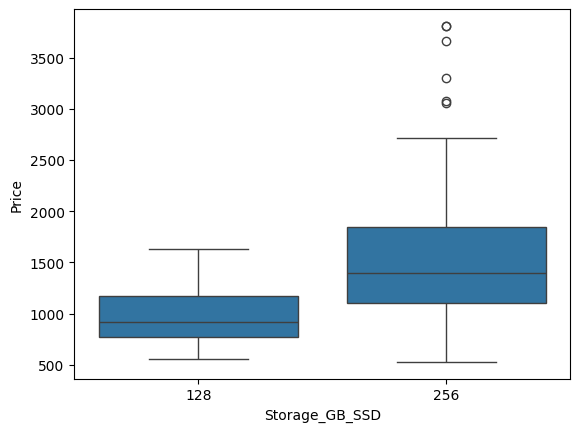

In [22]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot

sns.boxplot(x='Storage_GB_SSD',y='Price',data=Room4_df)

In [30]:

corr1 = Room4_df[['Storage_GB_SSD','Price']].corr()


,Storage_GB_SSD,Price
Storage_GB_SSD,1.000000,0.243421
Price,0.243421,1.000000


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [23]:
# Write your code below and press Shift+Enter to execute

Room4_df.describe(include="all")

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [24]:
# Write your code below and press Shift+Enter to execute
# Create the group

GPU_CPUCore_Price_grp = Room4_df[['GPU','CPU_core','Price']]
GPU_CPUCore_Price_grouped = GPU_CPUCore_Price_grp.groupby(['GPU','CPU_core'],as_index=False).mean()

GPU_CPUCore_Price_grouped


,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [25]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table

GPU_CPUCore_Price_pivot = GPU_CPUCore_Price_grouped.pivot(index='GPU',columns="CPU_core")

GPU_CPUCore_Price_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

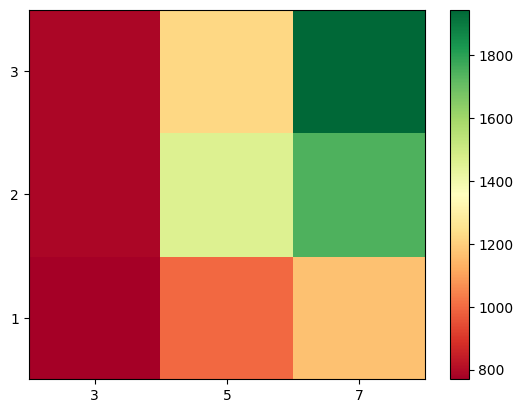

In [26]:
# Write your code below and press Shift+Enter to execute
# Create the Plot

# plt.pcolor(GPU_CPUCore_Price_pivot,cmap='RdYlGn')
# plt.colorbar()
# plt.show()

figure,axes = plt.subplots()

im = axes.pcolor(GPU_CPUCore_Price_pivot,cmap="RdYlGn")

x_labels = GPU_CPUCore_Price_pivot.columns.levels[1]
y_labels = GPU_CPUCore_Price_pivot.index

axes.set_xticks(np.arange(GPU_CPUCore_Price_pivot.shape[1]) + 0.5, minor=False)
axes.set_yticks(np.arange(GPU_CPUCore_Price_pivot.shape[0]) + 0.5, minor=False)

axes.set_xticklabels(x_labels,minor=False)
axes.set_yticklabels(y_labels,minor=False)

figure.colorbar(im)
plt.show()

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [27]:
# Write your code below and press Shift+Enter to execute


In [28]:
# Person coefficient p-value for GPU

pearsonCoefficient,p_value = stats.pearsonr(Room4_df['GPU'],Room4_df['Price'])

print(f'Pearson Coefficient : {pearsonCoefficient}, p-value : {p_value}')

Pearson Coefficient : 0.28829819888814273, p-value : 6.166949698364264e-06


The correlation is statistically significant but with a very weak linear relationship

In [29]:
# Person coefficient p-value for CPU_core

pearsonCoefficient,p_value = stats.pearsonr(Room4_df['CPU_core'],Room4_df['Price'])

print(f'Pearson Coefficient : {pearsonCoefficient}, p-value : {p_value}')

Pearson Coefficient : 0.45939777733551157, p-value : 7.912950127009089e-14


The correlation is statistically significant but with a weak linear relationship

# END

## Thank you for listening


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|--!>
